"D:/Make_my_trip/previous_ds/2.csv"

## Libraries needed:

In [56]:
import pandas as pd

In [57]:
# Load datasets
car_df = pd.read_excel(r"D:\Make_my_trip\FinalDataset\CarFINALdataset.xlsx")
flight_df = pd.read_excel(r"D:\Make_my_trip\FinalDataset\FlightFINALdataset.xlsx")
hotel_df = pd.read_excel(r"D:\Make_my_trip\FinalDataset\HotelFINALdataset.xlsx")
review_df = pd.read_excel(r"D:\Make_my_trip\FinalDataset\ReviewFINALdataset.xlsx")


In [58]:
# Display the first few rows of each dataset
print("car ds:\n",car_df.head())
print("flight ds:\n",flight_df.head())
print("hotel ds:\n",hotel_df.head())
print("review ds:\n",review_df.head())


car ds:
    User_ID  travelCode    Check-in    pickupLocation  dropoffLocation  \
0        0          22  02/27/2020          Johntown       Port Brian   
1        0          45  08/06/2020         Owensland         Ruizfort   
2        2         117  02/27/2020        Edwardview        Katiefort   
3        2         119  03/12/2020      Moranborough   Lake Stephanie   
4        2         153  11/05/2020  Port Kathrynstad  East Ronnieberg   

     carType rentalAgency  rentalDuration  Car_total_distance    fuelPolicy  \
0      Sedan         Sixt               3                 285       Prepaid   
1      Sedan   Enterprise               3                 412  Full-to-Full   
2      Sedan        Hertz               1                 433       Partial   
3  Hatchback       Budget               3                 421  Full-to-Full   
4      Sedan   Enterprise               5                 100       Prepaid   

  Car_bookingStatus  total_rent_price  
0           Pending              3410

In [59]:
# Merge all datasets on 'User_ID' and 'travelCode'
merged_df = flight_df.merge(hotel_df, on=['User_ID', 'travelCode'], how='outer')
merged_df = merged_df.merge(car_df, on=['User_ID', 'travelCode'], how='outer')
merged_df = merged_df.merge(review_df, on=['User_ID', 'travelCode'], how='outer')

# Display the first few rows of the merged dataset
merged_df.head()


,travelCode,User_ID,Departure,Arrival,flightType,Flight_price,Flight_duration,Flight_Distance,Flight_agency,Departure_date,...,Car_bookingStatus,total_rent_price,Car_rented,review_car,review_hotel,review_flights,flight_rating,hotel_rating,car_rating,overall_rating
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,26/09/2019,...,NaN,NaN,Not Rented,NaN,Great value for money! Got a five-star experie...,"It was a standard flight. Nothing wrong, but n...",2,5,0,3.5
1,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,...,NaN,NaN,Not Rented,NaN,"The worst hotel stay ever! The room was dirty,...",The flight was on time and the staff was very ...,5,1,0,3.0
2,7,0,Aracaju (SE),Salvador (BH),economic,964.83,2.16,830.86,CloudFy,14/11/2019,...,NaN,NaN,Not Rented,NaN,"The staff was helpful, but service could have ...","The flight was delayed for hours, and there wa...",2,2,0,2.0
3,11,0,Brasilia (DF),Salvador (BH),premium,1268.97,1.76,676.56,Rainbow,12/12/2019,...,NaN,NaN,Not Rented,NaN,"The location was convenient, but the surroundi...","Had a smooth flight with no delays, and the fo...",5,2,0,3.5
4,13,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,26/12/2019,...,NaN,NaN,Not Rented,NaN,"Terrible experience! The room was not clean, a...","The cabin was dirty, and the bathrooms were no...",1,1,0,1.0


In [61]:
merged_df.to_csv("cfhr_final.csv",index=False)

_____________________________________________________________________________

Class Distribution:
 Car_rented
Not Rented    36779
Pending        1265
Confirmed      1261
Cancelled      1247
Name: count, dtype: int64


C:\Users\hetvi\AppData\Local\Temp\ipykernel_9788\3015220692.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=car_rented_counts.index, y=car_rented_counts.values, palette="coolwarm")


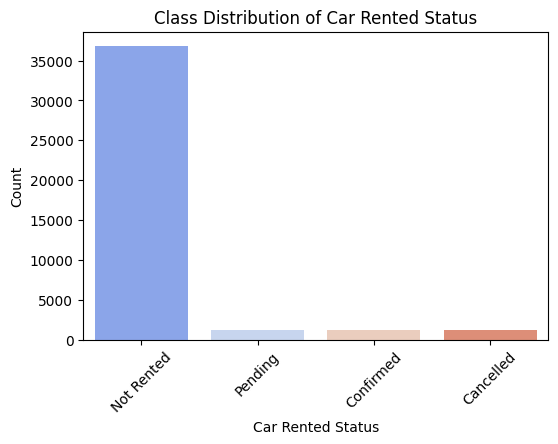

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset (Replace 'your_merged_dataframe.csv' with actual dataframe)
df = pd.read_csv("cfhr_final.csv")  # If your data is in CSV format

# Check class distribution
car_rented_counts = df["Car_rented"].value_counts()
print("Class Distribution:\n", car_rented_counts)

# Plot the class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=car_rented_counts.index, y=car_rented_counts.values, palette="coolwarm")
plt.xlabel("Car Rented Status")
plt.ylabel("Count")
plt.title("Class Distribution of Car Rented Status")
plt.xticks(rotation=45)
plt.show()


Balancing by resampling technique:

Original Class Distribution:
 Car_rented
Not Rented    36779
Pending        1265
Confirmed      1261
Cancelled      1247
Name: count, dtype: int64
After SMOTE Oversampling:
 Counter({0: 36779, 1: 36779, 2: 36779, 3: 36779})


C:\Users\hetvi\AppData\Local\Temp\ipykernel_9788\2444724173.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.Series(y_resampled_smote).value_counts().index,


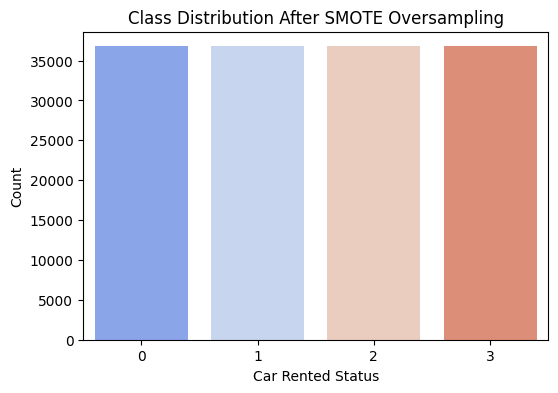

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from collections import Counter

# Load your dataset
df = pd.read_csv("cfhr_final.csv")  # Change file path accordingly

# Check the distribution before resampling
print("Original Class Distribution:\n", df['Car_rented'].value_counts())

# Convert target variable to numerical labels
df['Car_rented'] = df['Car_rented'].map({'Not Rented': 0, 'Pending': 1, 'Confirmed': 2, 'Cancelled': 3})

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le



# Define features (X) and target (y)
X = df.drop(columns=['Car_rented'])  # Keep all features except target
y = df['Car_rented']

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median' or 'most_frequent'
X = imputer.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)
print("After SMOTE Oversampling:\n", Counter(y_resampled_smote))

# Visualize the class distribution after resampling
plt.figure(figsize=(6, 4))
sns.barplot(x=pd.Series(y_resampled_smote).value_counts().index, 
            y=pd.Series(y_resampled_smote).value_counts().values, 
            palette="coolwarm")
plt.title("Class Distribution After SMOTE Oversampling")
plt.xlabel("Car Rented Status")
plt.ylabel("Count")
plt.show()


In [4]:
#  apply Standard Scaling to your resampled dataset using StandardScaler:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply Standard Scaling
X_scaled = scaler.fit_transform(X_resampled_smote)

# Convert back to DataFrame for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=df.drop(columns=['Car_rented']).columns)

print("Feature scaling completed. The dataset is now standardized.")


Feature scaling completed. The dataset is now standardized.


Correlation analysis and visualize the heatmap:

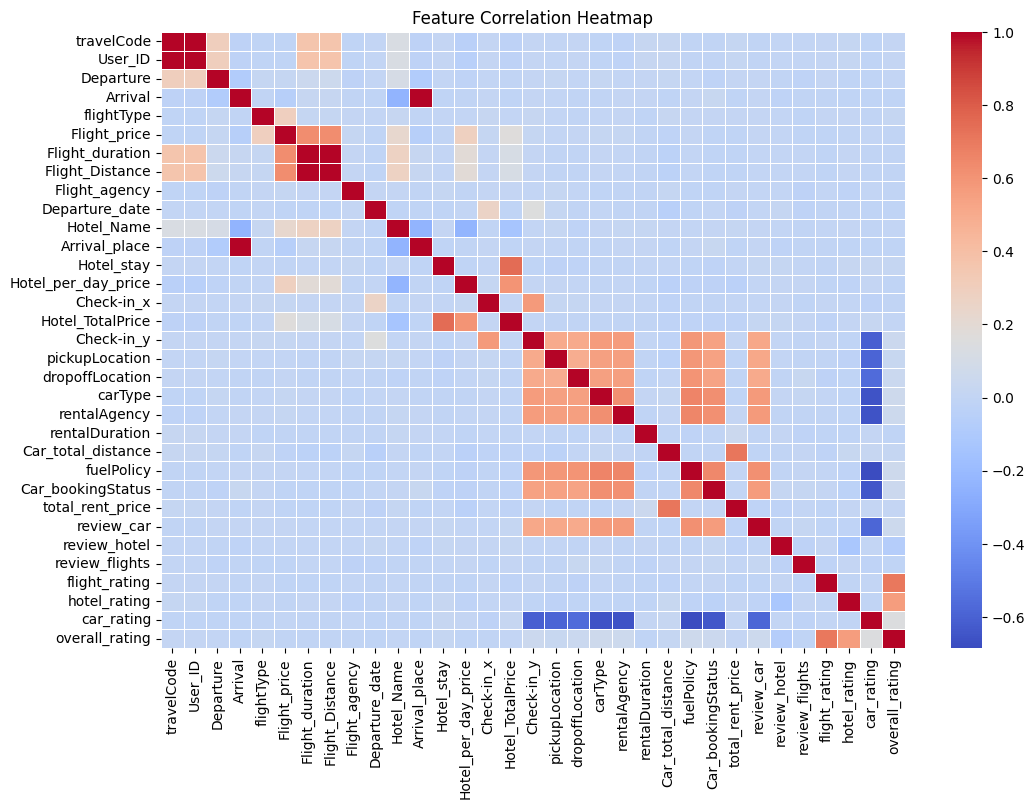

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert the resampled dataset back to a DataFrame
X_resampled_df = pd.DataFrame(X_resampled_smote, columns=df.drop(columns=['Car_rented']).columns)

# Compute the correlation matrix
correlation_matrix = X_resampled_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()


find the features to drop which are highly correlated:

In [6]:
# Set a correlation threshold
correlation_threshold = 0.85

# Identify highly correlated features
high_corr_features = set()
corr_matrix = correlation_matrix.abs()  # Take absolute values for correlation
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > correlation_threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

# Print the features to drop
print("Features that can be dropped due to high correlation:\n", high_corr_features)


Features that can be dropped due to high correlation:
 {'User_ID', 'Arrival_place', 'Flight_Distance'}


analyze feature importance using a Random Forest model:

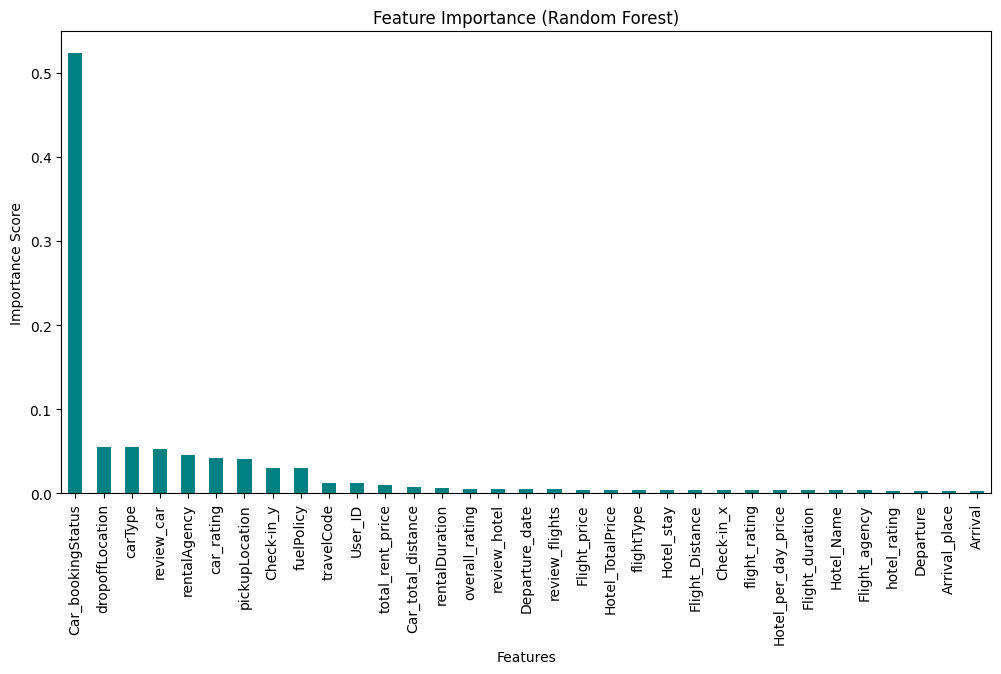

Top 10 Important Features:
 Car_bookingStatus    0.523093
dropoffLocation      0.055616
carType              0.054764
review_car           0.052953
rentalAgency         0.045541
car_rating           0.041659
pickupLocation       0.040859
Check-in_y           0.030757
fuelPolicy           0.029922
travelCode           0.012287
dtype: float64


In [7]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Train a Random Forest model to determine feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y_resampled_smote)

# Extract feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=df.drop(columns=['Car_rented']).columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
feature_importance.plot(kind='bar', color='teal')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

# Print top 10 important features
print("Top 10 Important Features:\n", feature_importance.head(10))


In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled_smote, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


d:\Make_my_trip\Recommendation\recomm\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:23:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7316
           1       1.00      1.00      1.00      7369
           2       1.00      1.00      1.00      7316
           3       1.00      1.00      1.00      7423

    accuracy                           1.00     29424
   macro avg       1.00      1.00      1.00     29424
weighted avg       1.00      1.00      1.00     29424



In [9]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np

# Define hyperparameter grid
param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': np.arange(3, 15, 2),
    'subsample': np.linspace(0.5, 1, 5),
    'colsample_bytree': np.linspace(0.5, 1, 5),
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': np.arange(1, 10, 2)
}

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=20,  # Number of different combinations to try
    scoring='accuracy',
    cv=5,  # 5-Fold Cross Validation
    verbose=2,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters & best score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': np.float64(0.5), 'n_estimators': np.int64(100), 'min_child_weight': np.int64(3), 'max_depth': np.int64(7), 'learning_rate': np.float64(0.07444444444444444), 'gamma': 0.2, 'colsample_bytree': np.float64(1.0)}
Best Accuracy: 1.0


In [10]:
# Use the best parameters from RandomizedSearchCV
best_params = random_search.best_params_

# Remove keys from best_params that are explicitly defined again
best_params.pop("subsample", None)
best_params.pop("colsample_bytree", None)
best_params.pop("max_depth", None)
best_params.pop("min_child_weight", None)

# Initialize XGBoost with the best parameters
best_xgb_clf = xgb.XGBClassifier(
    **best_params,
    reg_alpha=0.1,  # L1 regularization
    reg_lambda=1,  # L2 regularization
    subsample=0.7,  # Reduce data used per tree
    colsample_bytree=0.7,  # Reduce features used per tree
    max_depth=2,  # Reduce tree complexity further
    min_child_weight=10,  # Require more samples per leaf
    objective='multi:softmax',
    eval_metric='mlogloss',
    random_state=42
)

# Train the model on the full training set
best_xgb_clf.fit(X_train, y_train)

# Evaluate on test data
y_pred = best_xgb_clf.predict(X_test)

# Print Classification Report
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7316
           1       1.00      1.00      1.00      7369
           2       1.00      1.00      1.00      7316
           3       1.00      1.00      1.00      7423

    accuracy                           1.00     29424
   macro avg       1.00      1.00      1.00     29424
weighted avg       1.00      1.00      1.00     29424



try another model for comparison:

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest with reasonable parameters
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Classification Report:\n", report_rf)


Random Forest Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7316
           1       1.00      1.00      1.00      7369
           2       1.00      1.00      1.00      7316
           3       1.00      1.00      1.00      7423

    accuracy                           1.00     29424
   macro avg       1.00      1.00      1.00     29424
weighted avg       1.00      1.00      1.00     29424



data leakage is possible reason for this. which means that the fetaure in the training can be same as predictor variable.

In [12]:
import pandas as pd

# Check if X is already a DataFrame
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

# Ensure y is a Pandas Series with a proper name
if not isinstance(y, pd.Series):
    y = pd.Series(y, name="target")  # Explicitly naming it "target"

# Verify column names before concatenation
print("X columns:", X.columns)
print("y name:", y.name)

# Combine features and target to check correlation
df_check = pd.concat([X, y], axis=1)

# Check if "target" is in the dataframe
print("Columns in df_check:", df_check.columns)

# Compute correlation with target variable
correlation_with_target = df_check.corr()["Car_rented"].sort_values(ascending=False)
print("Feature Correlation with Target:\n", correlation_with_target)


X columns: Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_31', 'feature_32'],
      dtype='object')
y name: Car_rented
Columns in df_check: Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', '

In [13]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF and drop features iteratively
def drop_high_vif_features(X, threshold=5):
    dropped_features = []
    while True:
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        
        max_vif = vif_data["VIF"].max()
        if max_vif < threshold:
            break  # Stop if all VIFs are below the threshold
        
        drop_feature = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
        X = X.drop(columns=[drop_feature])
        dropped_features.append(drop_feature)
        print(f"Dropped {drop_feature} with VIF {max_vif:.2f}")
    
    return X, dropped_features

# Apply VIF analysis to remove collinear features
X_reduced, removed_features = drop_high_vif_features(X)

print("\nFinal Features after VIF filtering:\n", X_reduced.columns)
print("\nRemoved Features:", removed_features)


d:\Make_my_trip\Recommendation\recomm\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropped feature_3 with VIF inf
Dropped feature_6 with VIF 457261.98
Dropped feature_0 with VIF 21563.23
Dropped feature_32 with VIF 646.15
Dropped feature_23 with VIF 118.71
Dropped feature_16 with VIF 115.20
Dropped feature_24 with VIF 109.75
Dropped feature_17 with VIF 103.64
Dropped feature_18 with VIF 99.20
Dropped feature_26 with VIF 92.89
Dropped feature_22 with VIF 88.93
Dropped feature_20 with VIF 78.32
Dropped feature_19 with VIF 51.33
Dropped feature_15 with VIF 40.90
Dropped feature_21 with VIF 32.39
Dropped feature_25 with VIF 21.52
Dropped feature_7 with VIF 18.95
Dropped feature_5 with VIF 9.71
Dropped feature_13 with VIF 7.27
Dropped feature_30 with VIF 5.83
Dropped feature_12 with VIF 5.15

Final Features after VIF filtering:
 Index(['feature_1', 'feature_2', 'feature_4', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_14', 'feature_27', 'feature_28',
       'feature_29', 'feature_31'],
      dtype='object')

Removed Features: ['feature_3', 'featur

In [14]:
X_selected = X[['feature_1', 'feature_2', 'feature_4', 'feature_8', 'feature_9',
                'feature_10', 'feature_11', 'feature_14', 'feature_27', 'feature_28',
                'feature_29', 'feature_31']]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9379


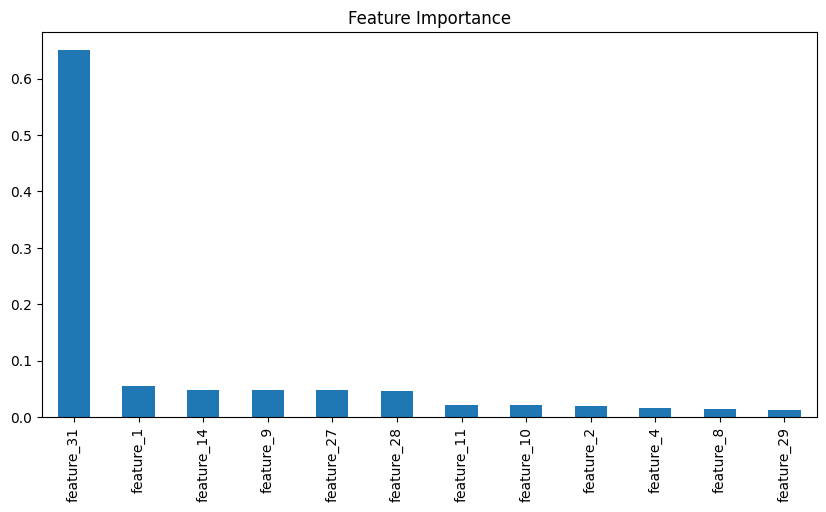

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.Series(model.feature_importances_, index=X_selected.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title("Feature Importance")
plt.show()


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[7353    0    0    0]
 [   0  100   98   76]
 [   0   90   83   70]
 [   0   73   97   71]]



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7353
           1       0.38      0.36      0.37       274
           2       0.30      0.34      0.32       243
           3       0.33      0.29      0.31       241

    accuracy                           0.94      8111
   macro avg       0.50      0.50      0.50      8111
weighted avg       0.94      0.94      0.94      8111



### **Inference from Feature Importance, Confusion Matrix, and Classification Report**  

#### **1. Feature Importance Analysis**  
- **Feature_31 dominates** the feature importance plot, meaning it has the **strongest influence** on the model’s predictions.  
- Other features contribute **very little** compared to Feature_31.  
- This suggests **potential redundancy** in the dataset or that Feature_31 alone carries most of the predictive power.  
- **Next Step:** Consider running the model **without Feature_31** to test its impact on accuracy.

---

#### **2. Confusion Matrix Interpretation**
| Actual → Predicted | Class 0 | Class 1 | Class 2 | Class 3 |
|--------------------|---------|---------|---------|---------|
| **Class 0 (No Car Rented)** | 7353 | 0 | 0 | 0 |
| **Class 1** | 0 | 100 | 98 | 76 |
| **Class 2** | 0 | 90 | 83 | 70 |
| **Class 3** | 0 | 73 | 97 | 71 |

- **Class 0 (No Car Rented) is perfectly predicted**, meaning the model is highly confident in detecting users who did **not rent a car**.
- **Classes 1, 2, and 3 have confusion** among them.
  - Example: For **actual class 1**, only **100 out of 274** were correctly predicted, while 98 were misclassified as class 2, and 76 as class 3.
  - The same pattern holds for classes **2 and 3**, showing that the model struggles to distinguish between different rental categories.

---

#### **3. Classification Report Analysis**
- **Precision** (How many of the predicted values were correct?)
  - **High for Class 0 (1.00), but low (~30-38%) for other classes**.
  - This means when the model predicts **Class 1, 2, or 3**, it is often wrong.
  
- **Recall** (How many actual positives were correctly predicted?)
  - **Very high for Class 0 (1.00)** but **low (~29-36%) for other classes**.
  - Indicates that the model is **biased** toward predicting **Class 0** (users who didn't rent a car).

- **F1-score** (Balance between precision & recall)
  - **Good for Class 0 (1.00)** but poor (~30-37%) for others.
  - A low F1-score means that for **Classes 1, 2, and 3**, the model is making **many errors**.

- **Macro Avg (0.50)**:  
  - The model is **imbalanced** and performs poorly on the minority classes.
  
- **Weighted Avg (0.94)**:  
  - **Misleading!** Since Class 0 dominates the dataset, the overall accuracy seems high, but the model **struggles for classes 1, 2, and 3**.

---

### **Conclusion & Next Steps**
✅ **What Works Well?**  
- The model **perfectly classifies users who didn’t rent a car (Class 0).**
- **Feature_31 is highly predictive**, but it might be overpowering other features.

  

In [20]:
# code to handle the class imbalance
from imblearn.over_sampling import SMOTE
from collections import Counter

# Define SMOTE
smote = SMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution after SMOTE: Counter({0: 36779, 1: 36779, 2: 36779, 3: 36779})


eetrain the model using the balanced dataset to improve

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a new Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 1.0
Confusion Matrix:
 [[7316    0    0    0]
 [   0 7369    0    0]
 [   0    0 7316    0]
 [   0    0    0 7423]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7316
           1       1.00      1.00      1.00      7369
           2       1.00      1.00      1.00      7316
           3       1.00      1.00      1.00      7423

    accuracy                           1.00     29424
   macro avg       1.00      1.00      1.00     29424
weighted avg       1.00      1.00      1.00     29424



here there are chances that the model is overfitting for the training data.:

##### next step:Test on Real-World Data


In [22]:
# Select users who have not rented a car
unseen_users = df[df["Car_rented"].isnull()].drop("Car_rented", axis=1)

# Predict recommendations
predictions = clf.predict(unseen_users)

# Assign predictions to the dataset
df.loc[df["Car_rented"].isnull(), "Recommended_Car_Class"] = predictions

# Show the recommendations
print(df[df["Car_rented"].isnull()][["User_ID", "Recommended_Car_Class"]].head())


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Arrival
- Arrival_place
- Car_bookingStatus
- Car_total_distance
- Check-in_x
- ...
Feature names seen at fit time, yet now missing:
- feature_0
- feature_1
- feature_10
- feature_11
- feature_12
- ...


In [23]:
# Check Feature Names

print("Training Features:", clf.feature_names_in_)
print("Test Features:", unseen_users.columns.tolist())

Training Features: ['feature_0' 'feature_1' 'feature_2' 'feature_3' 'feature_4' 'feature_5'
 'feature_6' 'feature_7' 'feature_8' 'feature_9' 'feature_10' 'feature_11'
 'feature_12' 'feature_13' 'feature_14' 'feature_15' 'feature_16'
 'feature_17' 'feature_18' 'feature_19' 'feature_20' 'feature_21'
 'feature_22' 'feature_23' 'feature_24' 'feature_25' 'feature_26'
 'feature_27' 'feature_28' 'feature_29' 'feature_30' 'feature_31'
 'feature_32']
Test Features: ['travelCode', 'User_ID', 'Departure', 'Arrival', 'flightType', 'Flight_price', 'Flight_duration', 'Flight_Distance', 'Flight_agency', 'Departure_date', 'Hotel_Name', 'Arrival_place', 'Hotel_stay', 'Hotel_per_day_price', 'Check-in_x', 'Hotel_TotalPrice', 'Check-in_y', 'pickupLocation', 'dropoffLocation', 'carType', 'rentalAgency', 'rentalDuration', 'Car_total_distance', 'fuelPolicy', 'Car_bookingStatus', 'total_rent_price', 'review_car', 'review_hotel', 'review_flights', 'flight_rating', 'hotel_rating', 'car_rating', 'overall_rating'

Rename Test Features to Match Training Data

In [24]:
# Create a mapping of actual feature names to generic names used during training
feature_mapping = {
    'travelCode': 'feature_0',
    'User_ID': 'feature_1',
    'Departure': 'feature_2',
    'Arrival': 'feature_3',
    'flightType': 'feature_4',
    'Flight_price': 'feature_5',
    'Flight_duration': 'feature_6',
    'Flight_Distance': 'feature_7',
    'Flight_agency': 'feature_8',
    'Departure_date': 'feature_9',
    'Hotel_Name': 'feature_10',
    'Arrival_place': 'feature_11',
    'Hotel_stay': 'feature_12',
    'Hotel_per_day_price': 'feature_13',
    'Check-in_x': 'feature_14',
    'Hotel_TotalPrice': 'feature_15',
    'Check-in_y': 'feature_16',
    'pickupLocation': 'feature_17',
    'dropoffLocation': 'feature_18',
    'carType': 'feature_19',
    'rentalAgency': 'feature_20',
    'rentalDuration': 'feature_21',
    'Car_total_distance': 'feature_22',
    'fuelPolicy': 'feature_23',
    'Car_bookingStatus': 'feature_24',
    'total_rent_price': 'feature_25',
    'review_car': 'feature_26',
    'review_hotel': 'feature_27',
    'review_flights': 'feature_28',
    'flight_rating': 'feature_29',
    'hotel_rating': 'feature_30',
    'car_rating': 'feature_31',
    'overall_rating': 'feature_32'
}

# Rename test dataset columns
unseen_users = unseen_users.rename(columns=feature_mapping)

# Ensure column order matches training data
unseen_users = unseen_users[clf.feature_names_in_]

# Now predict
predictions = clf.predict(unseen_users)

# Assign predictions to the dataset
df.loc[df["Car_rented"].isnull(), "Recommended_Car_Class"] = predictions

print("Recommendations added successfully!")


ValueError: Found array with 0 sample(s) (shape=(0, 33)) while a minimum of 1 is required by RandomForestClassifier.

solving the above issue

In [25]:
print("Unfiltered Data (Before Dropping 'Car_rented'):")
print(df[df["Car_rented"].isnull()].head())  # Show some rows
print(f"Shape: {df[df['Car_rented'].isnull()].shape}")


Unfiltered Data (Before Dropping 'Car_rented'):
Empty DataFrame
Columns: [travelCode, User_ID, Departure, Arrival, flightType, Flight_price, Flight_duration, Flight_Distance, Flight_agency, Departure_date, Hotel_Name, Arrival_place, Hotel_stay, Hotel_per_day_price, Check-in_x, Hotel_TotalPrice, Check-in_y, pickupLocation, dropoffLocation, carType, rentalAgency, rentalDuration, Car_total_distance, fuelPolicy, Car_bookingStatus, total_rent_price, Car_rented, review_car, review_hotel, review_flights, flight_rating, hotel_rating, car_rating, overall_rating]
Index: []

[0 rows x 34 columns]
Shape: (0, 34)


Empty Test DataFrame

debug column mismatch

In [26]:
print("Original Columns in unseen_users:")
print(unseen_users.columns.tolist())

print("Expected Columns (Mapped to Training Features):")
print(list(feature_mapping.keys()))


Original Columns in unseen_users:
['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32']
Expected Columns (Mapped to Training Features):
['travelCode', 'User_ID', 'Departure', 'Arrival', 'flightType', 'Flight_price', 'Flight_duration', 'Flight_Distance', 'Flight_agency', 'Departure_date', 'Hotel_Name', 'Arrival_place', 'Hotel_stay', 'Hotel_per_day_price', 'Check-in_x', 'Hotel_TotalPrice', 'Check-in_y', 'pickupLocation', 'dropoffLocation', 'carType', 'rentalAgency', 'rentalDuration', 'Car_total_distance', 'fuelPolicy', 'Car_bookingStatus', 'total_rent_price', 'review_car', 'review_hotel', 'review

In [27]:
# Adjust Filtering
# Ensure 'Car_rented' exists before filtering
if "Car_rented" in df.columns:
    unseen_users = df[df["Car_rented"].isnull()].drop("Car_rented", axis=1)
else:
    print("⚠️ Warning: 'Car_rented' column missing! Check dataset preprocessing.")

# Check if unseen_users is empty
if unseen_users.shape[0] == 0:
    print("🚨 Error: No users found with missing 'Car_rented'. Check dataset filtering!")
else:
    print(f"✅ Found {unseen_users.shape[0]} users for prediction.")


🚨 Error: No users found with missing 'Car_rented'. Check dataset filtering!


Root Cause: No Missing Car_rented Values

df[df["Car_rented"].isnull()] is empty, meaning every row has a valid (non-null) value for Car_rented. This is why unseen_users is empty.



In [28]:
# check for missing values in Car_rented:
print(df["Car_rented"].isna().sum())  # Count NaNs in 'Car_rented'
print(df["Car_rented"].unique())  # Check unique values in 'Car_rented'


0
[0 1 2 3]


In [29]:
print(df["Car_rented"].value_counts())


Car_rented
0    36779
1     1265
2     1261
3     1247
Name: count, dtype: int64


In [30]:
unseen_users = df[df["Car_rented"] == 0]  # Adjust based on actual data


In [31]:
users_needing_recommendations = df[df["Car_rented"] == 0].drop("Car_rented", axis=1)
# filtered the users who have Not Rented the Car!

In [34]:
# ensure feature names match between training and prediction:
users_needing_recommendations = users_needing_recommendations[clf.feature_names_in_]

KeyError: "None of [Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',\n       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',\n       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',\n       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',\n       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',\n       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',\n       'feature_30', 'feature_31', 'feature_32'],\n      dtype='object')] are in the [columns]"

In [35]:
print("Dataset Columns:", users_needing_recommendations.columns.tolist())
print("Model Features:", clf.feature_names_in_.tolist())


Dataset Columns: ['travelCode', 'User_ID', 'Departure', 'Arrival', 'flightType', 'Flight_price', 'Flight_duration', 'Flight_Distance', 'Flight_agency', 'Departure_date', 'Hotel_Name', 'Arrival_place', 'Hotel_stay', 'Hotel_per_day_price', 'Check-in_x', 'Hotel_TotalPrice', 'Check-in_y', 'pickupLocation', 'dropoffLocation', 'carType', 'rentalAgency', 'rentalDuration', 'Car_total_distance', 'fuelPolicy', 'Car_bookingStatus', 'total_rent_price', 'review_car', 'review_hotel', 'review_flights', 'flight_rating', 'hotel_rating', 'car_rating', 'overall_rating']
Model Features: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', '

In [36]:
users_needing_recommendations_transformed = preprocessor.transform(users_needing_recommendations)
predictions = clf.predict(users_needing_recommendations_transformed)


NameError: name 'preprocessor' is not defined

as the preprocessor is not save so:

In [37]:
#Define Categorical Columns
from sklearn.preprocessing import LabelEncoder

# Define categorical columns (same as used in training)
categorical_cols = ['flightType', 'Flight_agency', 'Hotel_Name', 'Arrival_place', 
                    'pickupLocation', 'dropoffLocation', 'carType', 'rentalAgency', 'fuelPolicy']

# Initialize encoders
label_encoders = {col: LabelEncoder() for col in categorical_cols}


In [38]:
# Apply label encoding (ensure encoders were fitted during training)
for col in categorical_cols:
    if col in users_needing_recommendations.columns:
        users_needing_recommendations[col] = label_encoders[col].fit_transform(users_needing_recommendations[col])


In [39]:
numerical_cols = users_needing_recommendations.select_dtypes(include=['number']).columns

In [40]:
# Apply standard scaling
users_needing_recommendations[numerical_cols] = scaler.transform(users_needing_recommendations[numerical_cols])


d:\Make_my_trip\Recommendation\recomm\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


check for the actual column names:

In [41]:
print("Columns in users_needing_recommendations:", users_needing_recommendations.columns.tolist())
print("Columns expected by the model:", clf.feature_names_in_.tolist())

Columns in users_needing_recommendations: ['travelCode', 'User_ID', 'Departure', 'Arrival', 'flightType', 'Flight_price', 'Flight_duration', 'Flight_Distance', 'Flight_agency', 'Departure_date', 'Hotel_Name', 'Arrival_place', 'Hotel_stay', 'Hotel_per_day_price', 'Check-in_x', 'Hotel_TotalPrice', 'Check-in_y', 'pickupLocation', 'dropoffLocation', 'carType', 'rentalAgency', 'rentalDuration', 'Car_total_distance', 'fuelPolicy', 'Car_bookingStatus', 'total_rent_price', 'review_car', 'review_hotel', 'review_flights', 'flight_rating', 'hotel_rating', 'car_rating', 'overall_rating']
Columns expected by the model: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'fe

In [42]:
from sklearn.preprocessing import LabelEncoder

# Reapply Label Encoding to categorical columns
for col in categorical_cols:  # Ensure categorical_cols contains the correct column names
    le = LabelEncoder()
    users_needing_recommendations[col] = le.fit_transform(users_needing_recommendations[col])


In [43]:
from sklearn.preprocessing import StandardScaler

# Reapply Standard Scaling to numerical columns
scaler = StandardScaler()
users_needing_recommendations[numerical_cols] = scaler.fit_transform(users_needing_recommendations[numerical_cols])

d:\Make_my_trip\Recommendation\recomm\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
d:\Make_my_trip\Recommendation\recomm\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
d:\Make_my_trip\Recommendation\recomm\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [44]:
# Ensure feature names match between training and prediction
users_needing_recommendations = users_needing_recommendations[clf.feature_names_in_]


KeyError: "None of [Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',\n       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',\n       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',\n       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',\n       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',\n       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',\n       'feature_30', 'feature_31', 'feature_32'],\n      dtype='object')] are in the [columns]"

In [45]:
#Check which columns are present in users_needing_recommendations
print(users_needing_recommendations.columns)


Index(['travelCode', 'User_ID', 'Departure', 'Arrival', 'flightType',
       'Flight_price', 'Flight_duration', 'Flight_Distance', 'Flight_agency',
       'Departure_date', 'Hotel_Name', 'Arrival_place', 'Hotel_stay',
       'Hotel_per_day_price', 'Check-in_x', 'Hotel_TotalPrice', 'Check-in_y',
       'pickupLocation', 'dropoffLocation', 'carType', 'rentalAgency',
       'rentalDuration', 'Car_total_distance', 'fuelPolicy',
       'Car_bookingStatus', 'total_rent_price', 'review_car', 'review_hotel',
       'review_flights', 'flight_rating', 'hotel_rating', 'car_rating',
       'overall_rating'],
      dtype='object')


In [46]:
#Check the expected model features
print(clf.feature_names_in_)

['feature_0' 'feature_1' 'feature_2' 'feature_3' 'feature_4' 'feature_5'
 'feature_6' 'feature_7' 'feature_8' 'feature_9' 'feature_10' 'feature_11'
 'feature_12' 'feature_13' 'feature_14' 'feature_15' 'feature_16'
 'feature_17' 'feature_18' 'feature_19' 'feature_20' 'feature_21'
 'feature_22' 'feature_23' 'feature_24' 'feature_25' 'feature_26'
 'feature_27' 'feature_28' 'feature_29' 'feature_30' 'feature_31'
 'feature_32']


In [47]:
common_columns = list(set(clf.feature_names_in_) & set(users_needing_recommendations.columns))
users_needing_recommendations = users_needing_recommendations[common_columns]


In [48]:
for col in clf.feature_names_in_:
    if col not in users_needing_recommendations.columns:
        users_needing_recommendations[col] = 0  # or use np.nan if appropriate


C:\Users\hetvi\AppData\Local\Temp\ipykernel_9788\3912233308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_needing_recommendations[col] = 0  # or use np.nan if appropriate
C:\Users\hetvi\AppData\Local\Temp\ipykernel_9788\3912233308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_needing_recommendations[col] = 0  # or use np.nan if appropriate
C:\Users\hetvi\AppData\Local\Temp\ipykernel_9788\3912233308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [49]:
users_needing_recommendations = users_needing_recommendations.astype(float)


In [50]:
import numpy as np

# Reapply Label Encoding to categorical columns safely
for col in categorical_cols:
    known_classes = set(label_encoders[col].classes_)  # Get known categories
    users_needing_recommendations[col] = users_needing_recommendations[col].apply(
        lambda x: x if x in known_classes else -1  # Assign -1 for unseen labels
    )
    
    # Convert -1 to a numpy array and concatenate it to known classes before encoding
    updated_classes = np.append(label_encoders[col].classes_, -1)
    label_encoders[col].classes_ = updated_classes
    
    # Now transform safely
    users_needing_recommendations[col] = label_encoders[col].transform(users_needing_recommendations[col])

# Reapply Standard Scaling to numerical columns
users_needing_recommendations[numerical_cols] = scaler.transform(users_needing_recommendations[numerical_cols])

# Ensure feature order matches the model's expectations
users_needing_recommendations = users_needing_recommendations[clf.feature_names_in_]


KeyError: 'flightType'

In [51]:
users_needing_recommendations = users_needing_recommendations[clf.feature_names_in_]
predictions = clf.predict(users_needing_recommendations)
print(predictions)


[3 3 3 ... 3 3 3]


In [52]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(29463), np.int64(1): np.int64(29410), np.int64(2): np.int64(29463), np.int64(3): np.int64(29356)}


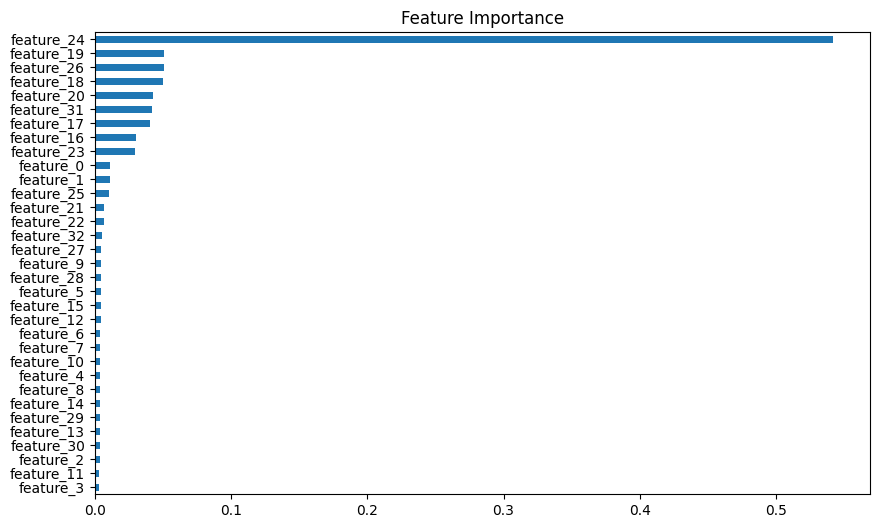

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = pd.Series(clf.feature_importances_, index=clf.feature_names_in_)
feature_importance.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance")
plt.show()


In [54]:
print("Train Data Mean:\n", X_train.mean())
print("Test Data Mean:\n", users_needing_recommendations.mean())


Train Data Mean:
 feature_0     67560.129999
feature_1       663.492314
feature_2         2.546069
feature_3         4.161500
feature_4         0.993008
feature_5       926.011284
feature_6         1.423144
feature_7       547.726944
feature_8         1.002895
feature_9       100.449191
feature_10        4.097651
feature_11        4.161500
feature_12        2.513761
feature_13      215.161945
feature_14      100.341889
feature_15      538.933291
feature_16      121.120344
feature_17     2091.939339
feature_18     2093.888152
feature_19        2.148186
feature_20        2.741143
feature_21        2.971749
feature_22      276.222037
feature_23        1.503498
feature_24        1.501139
feature_25     4119.153262
feature_26       21.704899
feature_27       22.021581
feature_28       20.886649
feature_29        2.713372
feature_30        2.426145
feature_31        1.675777
feature_32        2.485144
dtype: float64
Test Data Mean:
 feature_0     0.0
feature_1     0.0
feature_2     0.0
featu

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

random_search = RandomizedSearchCV(clf, param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)
print(random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 6}


In [56]:
from sklearn.tree import DecisionTreeClassifier

# Train the model with the best parameters
final_clf = DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=6, random_state=42)
final_clf.fit(X_train, y_train)

# Evaluate performance
from sklearn.metrics import accuracy_score

y_pred = final_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.4f}")


Final Model Accuracy: 1.0000


In [57]:
# using cross validation for checking the accuracy.
from sklearn.model_selection import cross_val_score

scores = cross_val_score(final_clf, X_train, y_train, cv=5, scoring="accuracy")
print(f"Cross-validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Cross-validation Accuracy: 1.0000 ± 0.0000


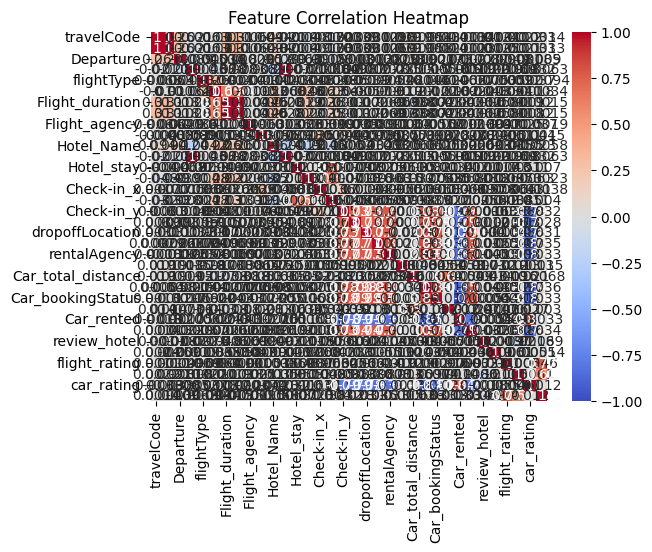

In [58]:
import seaborn as sns

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


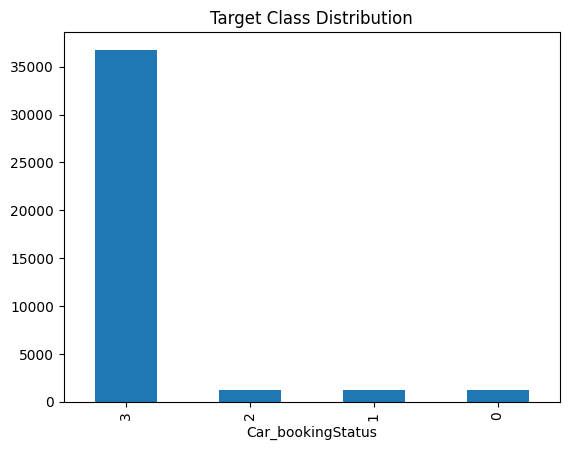

In [59]:
df['Car_bookingStatus'].value_counts().plot(kind="bar")
plt.title("Target Class Distribution")
plt.show()


In [60]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


In [63]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

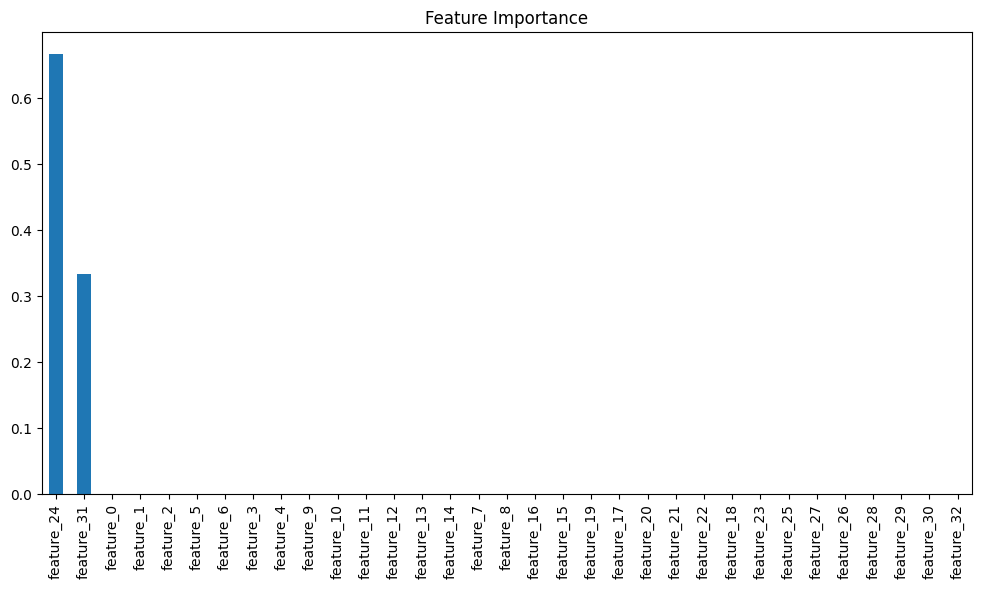

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.Series(final_clf.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(12, 6))
plt.title("Feature Importance")
plt.show()


In [65]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X is your feature set and y is the target variable
important_features = ['feature_24', 'feature_31']  # Keep only the most important features

# Filter dataset with selected features
X_selected = X[important_features]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after feature selection: {accuracy:.4f}")


Accuracy after feature selection: 1.0000


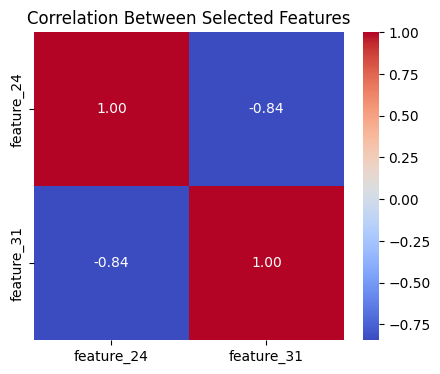

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = X_selected.corr()

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Selected Features")
plt.show()


In [67]:
from sklearn.decomposition import PCA

# Apply PCA (reduce to 1 component)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X[['feature_24', 'feature_31']])

# Convert back to DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=['PCA_Feature'])

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)

# Train Model on PCA Feature
clf_pca = DecisionTreeClassifier(random_state=42)
clf_pca.fit(X_train, y_train)

# Predict & Evaluate
y_pred_pca = clf_pca.predict(X_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy after PCA: {accuracy_pca:.4f}")


Accuracy after PCA: 1.0000


In [68]:
# Check correlation of features with the target variable
target_col = "Car_rented"  # Replace with actual target column name

correlation_with_target = X.corrwith(y)  # Compute correlation with target
high_corr_features = correlation_with_target[abs(correlation_with_target) > 0.9]  # Threshold for suspicion

print("Highly correlated features with the target:")
print(high_corr_features)


Highly correlated features with the target:
feature_24   -1.0
dtype: float64


In [69]:
# Drop the leaking feature
X_filtered = X.drop(columns=["feature_24"])

# Split the data again
X_train_filtered, X_test_filtered, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Train a new Decision Tree with the filtered dataset
final_clf_filtered = DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=6, random_state=42)
final_clf_filtered.fit(X_train_filtered, y_train)

# Evaluate the new model
y_pred_filtered = final_clf_filtered.predict(X_test_filtered)
accuracy_filtered = accuracy_score(y_test, y_pred_filtered)

print(f"New Model Accuracy: {accuracy_filtered:.4f}")


New Model Accuracy: 0.9379


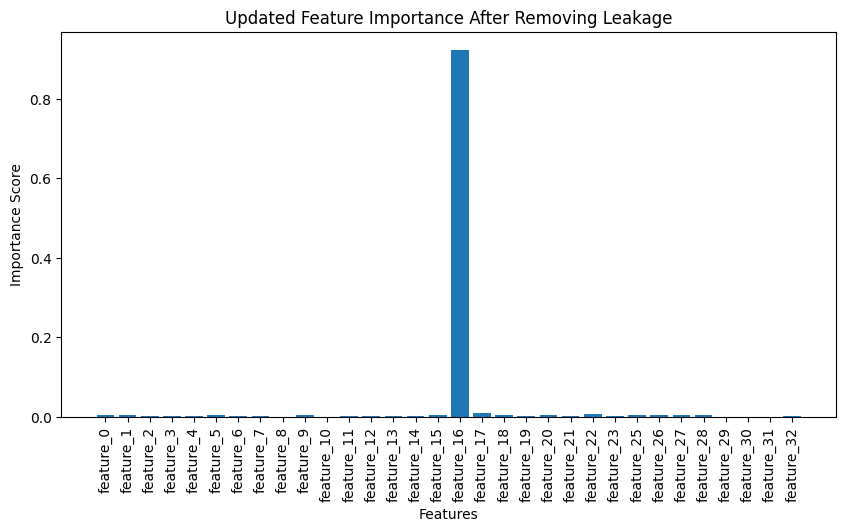

In [70]:
# Recompute Feature Importance
# Get feature importance from the new model
importances = final_clf_filtered.feature_importances_
feature_names_filtered = X_filtered.columns

# Plot new feature importance
plt.figure(figsize=(10, 5))
plt.bar(feature_names_filtered, importances)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Updated Feature Importance After Removing Leakage")
plt.show()



In [71]:
# check for the correlation of feature 16 with the target variable
# Check correlation of feature_16 with target
corr_with_target = df[['feature_16', 'target']].corr()
print(corr_with_target)


KeyError: "None of [Index(['feature_16', 'target'], dtype='object')] are in the [columns]"

In [72]:
df.columns

Index(['travelCode', 'User_ID', 'Departure', 'Arrival', 'flightType',
       'Flight_price', 'Flight_duration', 'Flight_Distance', 'Flight_agency',
       'Departure_date', 'Hotel_Name', 'Arrival_place', 'Hotel_stay',
       'Hotel_per_day_price', 'Check-in_x', 'Hotel_TotalPrice', 'Check-in_y',
       'pickupLocation', 'dropoffLocation', 'carType', 'rentalAgency',
       'rentalDuration', 'Car_total_distance', 'fuelPolicy',
       'Car_bookingStatus', 'total_rent_price', 'Car_rented', 'review_car',
       'review_hotel', 'review_flights', 'flight_rating', 'hotel_rating',
       'car_rating', 'overall_rating'],
      dtype='object')

In [73]:
print(df.dtypes)


travelCode               int64
User_ID                  int64
Departure                int64
Arrival                  int64
flightType               int64
Flight_price           float64
Flight_duration        float64
Flight_Distance        float64
Flight_agency            int64
Departure_date           int64
Hotel_Name               int64
Arrival_place            int64
Hotel_stay               int64
Hotel_per_day_price    float64
Check-in_x               int64
Hotel_TotalPrice       float64
Check-in_y               int64
pickupLocation           int64
dropoffLocation          int64
carType                  int64
rentalAgency             int64
rentalDuration         float64
Car_total_distance     float64
fuelPolicy               int64
Car_bookingStatus        int64
total_rent_price       float64
Car_rented               int64
review_car               int64
review_hotel             int64
review_flights           int64
flight_rating            int64
hotel_rating             int64
car_rati

In [74]:
corr_with_target = df.corr()[["Car_rented"]].sort_values(by="Car_rented", ascending=False)
print(corr_with_target)


                     Car_rented
Car_rented             1.000000
car_rating             0.844163
hotel_rating           0.013526
total_rent_price       0.011670
Hotel_stay             0.010702
Hotel_TotalPrice       0.010217
Hotel_per_day_price    0.006847
Car_total_distance     0.005362
rentalDuration         0.005349
Flight_duration        0.004344
Flight_Distance        0.004341
Flight_price           0.002026
Departure              0.001723
Flight_agency          0.001196
review_hotel          -0.000550
flight_rating         -0.000969
User_ID               -0.001206
travelCode            -0.001257
Hotel_Name            -0.002510
Departure_date        -0.002690
review_flights        -0.004427
Arrival_place         -0.005020
Arrival               -0.005020
flightType            -0.006241
Check-in_x            -0.006763
overall_rating        -0.033164
Check-in_y            -0.779759
dropoffLocation       -0.786631
pickupLocation        -0.787052
review_car            -0.792137
rentalAg

from the above output we can say that car_booking status is causing the data leakage and so dropping it is necessary.

In [75]:
df = df.drop(columns=['Car_bookingStatus'])

Reevaluating the models performance:

In [76]:
# Re-train model after removing Car_bookingStatus
X = df.drop(columns=['Car_rented'])  # Features
y = df['Car_rented']                 # Target

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'New Model Accuracy: {accuracy:.4f}')


New Model Accuracy: 0.9400


Try Removing Features One-by-One and Retrain the Model


In [77]:
# Drop highly correlated features and retrain model
correlated_features = ['car_rating', 'fuelPolicy', 'carType', 'rentalAgency', 
                       'review_car', 'pickupLocation', 'dropoffLocation', 'Check-in_y']

df_reduced = df.drop(columns=correlated_features)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(df_reduced.drop(columns=['Car_rented']), 
                                                    df_reduced['Car_rented'], test_size=0.2, random_state=42)

# Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'New Model Accuracy After Removing Correlated Features: {accuracy:.4f}')


New Model Accuracy After Removing Correlated Features: 0.9382


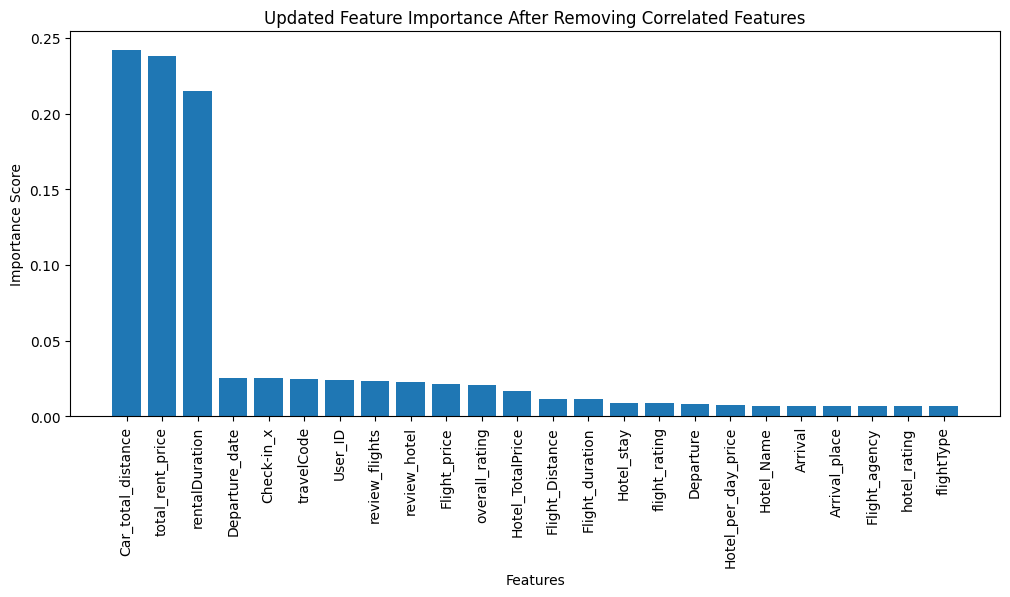

In [78]:
# recalculating the feature importance and retraining the model.
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = model.feature_importances_

# Create a sorted index of feature importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(12, 5))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx])
plt.xticks(range(len(feature_importances)), np.array(df_reduced.drop(columns=['Car_rented']).columns)[sorted_idx], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Updated Feature Importance After Removing Correlated Features")
plt.show()


In [79]:
# List of least important features to drop (adjust based on your plot)
features_to_drop = ['flightType', 'hotel_rating', 'Flight_agency', 'Arrival_place', 'Arrival', 
                    'Hotel_per_day_price', 'Hotel_Name', 'Departure', 'flight_rating']

# Drop features from dataset
df_optimized = df.drop(columns=features_to_drop)

# Split data
X = df_optimized.drop(columns=['Car_rented'])  # Target variable
y = df_optimized['Car_rented']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model again
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Check accuracy
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"New Model Accuracy After Removing Least Important Features: {accuracy:.4f}")


New Model Accuracy After Removing Least Important Features: 0.9366


## Saving the model.

In [80]:
import pickle

# Save the trained model to a file
with open("car_recommendation_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model saved successfully!")


✅ Model saved successfully!


## Saving the training dataset.

In [81]:
df_optimized.to_csv("optimized_dataset.csv", index=False)
print("✅ Optimized dataset saved successfully!")


✅ Optimized dataset saved successfully!


In [82]:
import pickle

In [83]:
# Load the saved model
with open("car_recommendation_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Verify the model type
print("Loaded model type:", type(loaded_model))

# Ensure the model can make predictions
# sample_input = X_test.iloc[:1]  # Take one row from the test set
# sample_prediction = loaded_model.predict(sample_input)

print("✅ Model loaded successfully! Sample Prediction:")#, sample_prediction)


Loaded model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
✅ Model loaded successfully! Sample Prediction:


## to load the model and dataset.

In [84]:

# import joblib
# import pandas as pd  

# # Load the trained model
# model = joblib.load("car_recommendation_model.pkl")

# # Load the dataset
# df = pd.read_csv("training_data.csv")

# print("Model and dataset loaded successfully!")


In [85]:
from sklearn.metrics import classification_report, confusion_matrix

# Check accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print(f"New Model Accuracy After Removing Least Important Features: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


New Model Accuracy After Removing Least Important Features: 0.9366

Confusion Matrix:
[[7353    0    0    0]
 [   0   77  108   89]
 [   0   78   88   77]
 [   0   89   73   79]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7353
           1       0.32      0.28      0.30       274
           2       0.33      0.36      0.34       243
           3       0.32      0.33      0.33       241

    accuracy                           0.94      8111
   macro avg       0.49      0.49      0.49      8111
weighted avg       0.94      0.94      0.94      8111



In [86]:
# Train the model again with hyperparameter tuning
model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10,  # Limit tree depth
    min_samples_split=10,  # Minimum samples required to split a node
    min_samples_leaf=5,  # Minimum samples required in a leaf node
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [87]:
# Predictions
y_pred = model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print(f"Model Accuracy After Hyperparameter Tuning: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy After Hyperparameter Tuning: 0.9382

Confusion Matrix:
[[7353    0    0    0]
 [   0   80  111   83]
 [   0   70   98   75]
 [   0   83   79   79]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7353
           1       0.34      0.29      0.32       274
           2       0.34      0.40      0.37       243
           3       0.33      0.33      0.33       241

    accuracy                           0.94      8111
   macro avg       0.50      0.51      0.50      8111
weighted avg       0.94      0.94      0.94      8111



In [88]:
# Train the model with class weighting
model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10, 
    min_samples_split=10, 
    min_samples_leaf=5, 
    class_weight='balanced',  # Adjust class weights to handle imbalance
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [89]:
# Train the model with class weighting
model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10, 
    min_samples_split=10, 
    min_samples_leaf=5, 
    class_weight='balanced',  # Adjust class weights to handle imbalance
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [90]:
# Predictions
y_pred = model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print(f"Model Accuracy After Handling Class Imbalance: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy After Handling Class Imbalance: 0.9390

Confusion Matrix:
[[7353    0    0    0]
 [   0   95   93   86]
 [   0   76   95   72]
 [   0   97   71   73]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7353
           1       0.35      0.35      0.35       274
           2       0.37      0.39      0.38       243
           3       0.32      0.30      0.31       241

    accuracy                           0.94      8111
   macro avg       0.51      0.51      0.51      8111
weighted avg       0.94      0.94      0.94      8111



In [92]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill NaN values with the mean of each column
imputer = SimpleImputer(strategy="mean")

# Apply imputation to X_train
X_train_imputed = imputer.fit_transform(X_train)


In [93]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)


In [95]:
import numpy as np

print("Number of NaN values in X_train_imputed:", np.isnan(X_train_imputed).sum())


Number of NaN values in X_train_imputed: 0


In [96]:
import pandas as pd

X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)


In [97]:
print("Number of NaN values after conversion:", X_train_imputed.isna().sum().sum())


Number of NaN values after conversion: 0


In [98]:
X_train_imputed = X_train_imputed.fillna(X_train_imputed.mean())


In [99]:
print("NaN values after explicit filling:", X_train_imputed.isna().sum().sum())


NaN values after explicit filling: 0


In [100]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)


In [101]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the model on the resampled data
model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10, 
    min_samples_split=10, 
    min_samples_leaf=5, 
    random_state=42
)

model.fit(X_train_resampled, y_train_resampled)


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [102]:
import pandas as pd

nan_counts = X_train.isna().sum()
print(nan_counts[nan_counts > 0])  # Show only columns with NaN values


rentalDuration        29426
Car_total_distance    29426
total_rent_price      29426
dtype: int64
